In [ ]:
# ! pip install matplotlib arabic-reshaper python-bidi


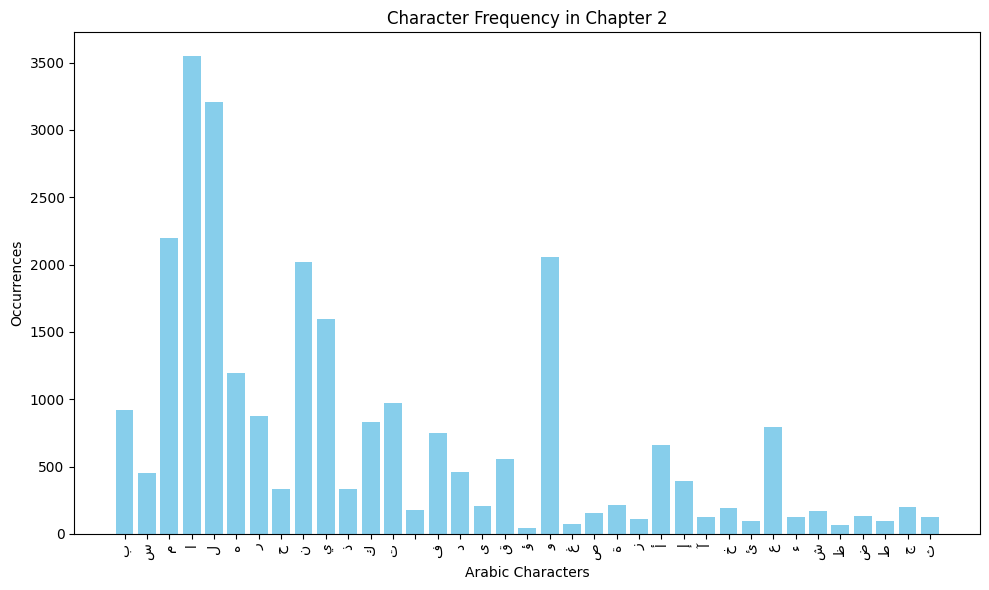

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

def process_arabic_text(file_path, chapter_number):
    char_count = Counter()
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split the line into chapter, verse, and text
            parts = line.strip().split('|')
            if len(parts) < 3:
                continue  # Skip malformed lines
            
            chap_num = int(parts[0])
            if chap_num>chapter_number:
                break # stop reading further
            if chap_num == chapter_number:
                text = parts[2]
                # Count Arabic characters in the verse text
                for char in text:
                    if '\u0600' <= char <= '\u06FF':  # Arabic Unicode range
                        char_count[char] += 1
    
    return char_count

def plot_histogram(char_count, chapter_number):
    # Reshape Arabic text for proper display
    reshaped_chars = [get_display(arabic_reshaper.reshape(char)) for char in char_count.keys()]
    counts = char_count.values()

    plt.figure(figsize=(10, 6))
    plt.bar(reshaped_chars, counts, color='skyblue')
    plt.xlabel('Arabic Characters')
    plt.ylabel('Occurrences')
    plt.title(f'Character Frequency in Chapter {chapter_number}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# File path and chapter number
file_path = 'quran-simple-clean.txt'  # Replace with the path to your dataset
chapter_number = 2  # Replace with the desired chapter number

# Process the dataset and plot the histogram
char_count = process_arabic_text(file_path, chapter_number)
plot_histogram(char_count, chapter_number)


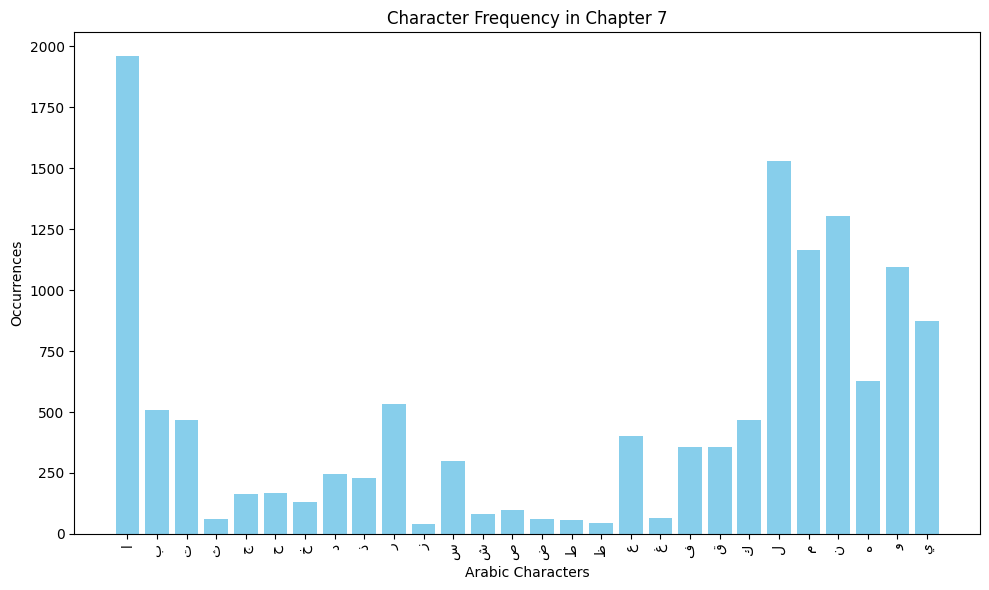

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

# Arabic alphabet in standard order (excluding diacritics and special characters)
arabic_alphabet = [
    'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 
    'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي'
]

def process_arabic_text(file_path, chapter_number):
    char_count = Counter()
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split the line into chapter, verse, and text
            parts = line.strip().split('|')
            if len(parts) < 3:
                continue  # Skip malformed lines
            
            chap_num = int(parts[0])
            if chap_num>chapter_number:
                break # stop reading further
            if chap_num == chapter_number:
                text = parts[2]
                # Count Arabic characters in the verse text
                for char in text:
                    if char in arabic_alphabet:  # Only count valid Arabic letters
                        char_count[char] += 1
    
    return char_count

def plot_histogram(char_count, chapter_number):
    # Sort characters by the standard Arabic alphabet order
    sorted_chars = [char for char in arabic_alphabet if char in char_count]
    sorted_counts = [char_count[char] for char in sorted_chars]

    # Reshape Arabic text for proper display
    reshaped_chars = [get_display(arabic_reshaper.reshape(char)) for char in sorted_chars]

    plt.figure(figsize=(10, 6))
    plt.bar(reshaped_chars, sorted_counts, color='skyblue')
    plt.xlabel('Arabic Characters')
    plt.ylabel('Occurrences')
    plt.title(f'Character Frequency in Chapter {chapter_number}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# File path and chapter number
file_path = 'quran-simple-clean.txt'  # Replace with the path to your dataset
chapter_number = 7  # Replace with the desired chapter number

# Process the dataset and plot the histogram
char_count = process_arabic_text(file_path, chapter_number)
plot_histogram(char_count, chapter_number)


In [12]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display

# Arabic alphabet in standard order (excluding diacritics and special characters)
arabic_alphabet = [
    'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 
    'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي'
]

def process_arabic_text(file_path):
    # Create a dictionary to store character counts for each chapter
    chapter_char_counts = {}

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split the line into chapter, verse, and text
            parts = line.strip().split('|')
            if len(parts) < 3:
                continue  # Skip malformed lines
            
            chap_num = int(parts[0])
            text = parts[2]

            if chap_num not in chapter_char_counts:
                chapter_char_counts[chap_num] = Counter()
            
            # Count Arabic characters in the verse text
            for char in text:
                if char in arabic_alphabet:  # Only count valid Arabic letters
                    chapter_char_counts[chap_num][char] += 1
    
    return chapter_char_counts

def save_histograms(chapter_char_counts, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    for chapter, char_count in chapter_char_counts.items():
        # Sort characters by the standard Arabic alphabet order
        sorted_chars = [char for char in arabic_alphabet if char in char_count]
        sorted_counts = [char_count[char] for char in sorted_chars]

        # Reshape Arabic text for proper display
        reshaped_chars = [get_display(arabic_reshaper.reshape(char)) for char in sorted_chars]

        # Plot the histogram
        plt.figure(figsize=(10, 6))
        plt.bar(reshaped_chars, sorted_counts, color='skyblue')
        plt.title(f'Character Frequency in Chapter {chapter}')
        plt.xlabel('Arabic Characters')
        plt.ylabel('Occurrences')
        plt.xticks(rotation=90)
        plt.tight_layout()

        # Save the plot
        plot_filename = os.path.join(output_folder, f'chapter_{chapter}.png')
        plt.savefig(plot_filename)
        plt.close()  # Close the plot to free memory

# File path and output folder
file_path = 'quran-simple-clean.txt'  # Replace with the path to your dataset
output_folder = 'plots'  # Replace with your desired output folder name

# Process the dataset and save the histograms
chapter_char_counts = process_arabic_text(file_path)
save_histograms(chapter_char_counts, output_folder)


In [13]:
from PIL import Image
import os

def create_gif(image_folder, gif_name, duration=500):
    # Get a sorted list of image files
    image_files = sorted(
        [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')],
        key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0])  # Sort by chapter number
    )

    # Load images
    images = [Image.open(img) for img in image_files]

    # Save as GIF
    gif_path = os.path.join(image_folder, gif_name)
    images[0].save(
        gif_path,
        save_all=True,
        append_images=images[1:],
        duration=duration,
        loop=0
    )

    print(f"GIF created and saved at {gif_path}")

# Folder with the images and GIF filename
image_folder = 'plots'  # Replace with your image folder path
gif_name = 'chapters_animation.gif'  # Name for the GIF file

# Create the GIF
create_gif(image_folder, gif_name)


GIF created and saved at plots\chapters_animation.gif
